<a href="https://colab.research.google.com/github/Arthur6363/Deep-Learning-ML/blob/main/Tensorflow_araba_analiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("merc.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [5]:
df.groupby('model')['price'].mean().sort_values(ascending=False)

model
 G Class      98934.200000
 GLS Class    47219.540541
 S Class      45075.451777
 GLE Class    40183.863341
 GLB Class    37673.526316
 GLC Class    32929.404167
 V Class      32446.623188
 SL CLASS     31217.442308
 X-CLASS      29695.109756
 CLS Class    26743.189873
 E Class      25481.420891
 C Class      23695.822258
 CL Class     21448.866928
 GL Class     21359.710744
 CLA Class    20836.058140
 GLA Class    20427.656434
220           19995.000000
 A Class      19849.597032
200           19495.000000
 B Class      18896.827411
 M Class      17365.936709
180           10799.000000
 SLK          10787.315789
 R Class       9474.500000
 CLC Class     5516.666667
230            4500.000000
 CLK           3077.857143
Name: price, dtype: float64

In [6]:
df.drop(["model"], axis=1, inplace=True)

In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [8]:
df.isnull().sum()

year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

<ipython-input-12-79345c2ef37d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])


<Axes: xlabel='price', ylabel='Density'>

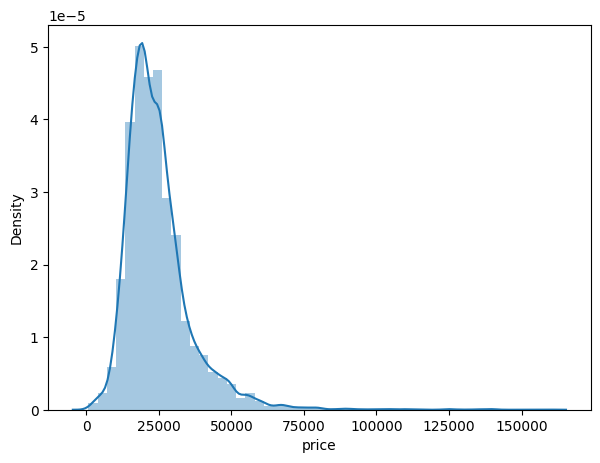

In [12]:
plt.figure(figsize=(7,5))
sns.distplot(df["price"])

In [14]:
df["year"].value_counts()


2019    4553
2017    2381
2016    1971
2018    1467
2015     991
2020     719
2014     491
2013     292
2012      57
2011      38
2010      38
2007      22
2009      17
2008      16
2004      13
2001      10
2002       9
2005       9
2006       8
2003       7
1998       4
2000       3
1997       1
1999       1
1970       1
Name: year, dtype: int64

In [15]:
df.corr()

<ipython-input-15-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [16]:
df.corr()["price"].sort_values()

<ipython-input-16-84e4c6ff1b57>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["price"].sort_values()


mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<Axes: xlabel='mileage', ylabel='price'>

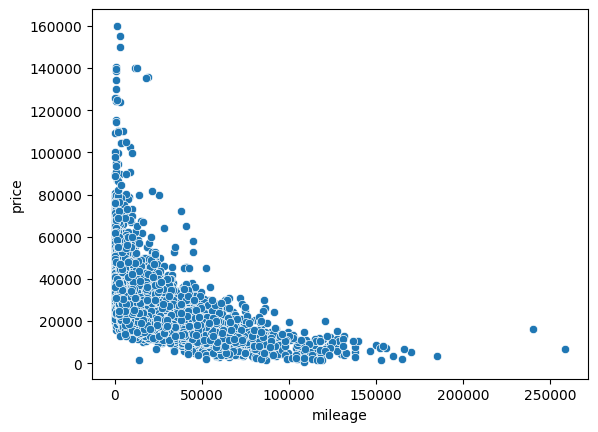

In [17]:
sns.scatterplot(x = "mileage", y="price", data=df)

In [19]:
df.sort_values("price", ascending=False).head(20)

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,Petrol,145,21.4,4.0
10044,2020,154998,Automatic,3000,Petrol,150,21.4,4.0
5,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,Petrol,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,Petrol,145,21.4,4.0
8,2019,139948,Automatic,12000,Petrol,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,Petrol,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,Petrol,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,Petrol,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,Petrol,150,21.4,4.0


In [20]:
df.sort_values("price", ascending=True).head(20)

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
11816,2003,650,Manual,109090,Petrol,235,40.0,1.4
12008,2010,1350,Manual,116126,Diesel,145,54.3,2.0
11765,2000,1490,Automatic,87000,Petrol,265,27.2,3.2
11549,2002,1495,Automatic,13800,Diesel,305,39.8,2.7
12594,2004,1495,Manual,119000,Petrol,300,34.5,1.8
11174,2001,1695,Automatic,108800,Diesel,325,31.7,3.2
12710,2006,1695,Automatic,153000,Petrol,300,33.6,1.8
12766,2004,1780,Automatic,118000,Diesel,265,41.5,2.2
12009,2007,1800,Automatic,84000,Petrol,200,42.8,1.5
11764,1998,1990,Automatic,99300,Petrol,265,32.1,2.3


In [27]:
dfdokuz = df.sort_values("price", ascending=False).iloc[131:] #en yüksek 131 değeri attık

In [28]:
dfdokuz.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


<Figure size 700x500 with 0 Axes>

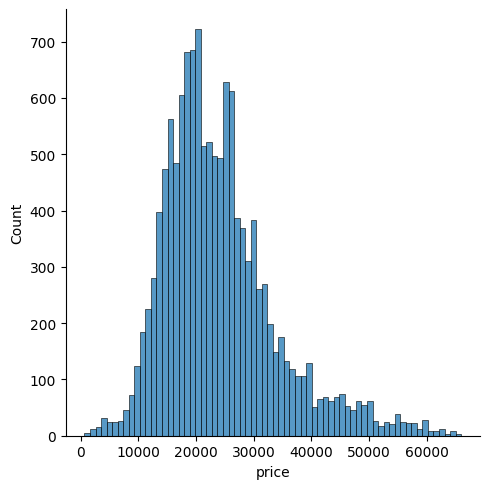

In [29]:
plt.figure(figsize=(7,5))
sns.displot(dfdokuz["price"])

In [31]:
df.groupby("year").mean()["price"]

<ipython-input-31-04efefce19b5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("year").mean()["price"]


year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [32]:
dfdokuz.groupby("year").mean()["price"]

<ipython-input-32-874240e2e752>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfdokuz.groupby("year").mean()["price"]


year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [33]:
df = dfdokuz

In [34]:
df = df[df.year != 1970]

In [35]:
df.groupby("year").mean()["price"]

<ipython-input-35-04efefce19b5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("year").mean()["price"]


year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [36]:
df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,Diesel,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,Petrol,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,Petrol,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,Petrol,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,Petrol,145,40.9,3.0


In [ ]:
df.drop("transmission", axis=1, inplace=True)

In [48]:
df.drop("fuelType", axis=1, inplace=True)

<ipython-input-48-31e08a010ad6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("fuelType", axis=1, inplace=True)


In [49]:
df.head(1)

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0


In [50]:
x = df.drop("price", axis=1).values
y = df["price"].values

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=63, test_size=0.30)

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler()

In [55]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [57]:
x_train.shape

(9090, 5)

In [58]:
model = Sequential()
model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))
model.add(Dense(1))
model.compile(optimizer = "adam", loss="mse")

In [59]:
model.fit(x=x_train, y = y_train,
          validation_data=(x_test,y_test),
          epochs=300,
          batch_size=250)

Epoch 1/300
37/37 [==============================] - 2s 18ms/step - loss: 675287936.0000 - val_loss: 680711104.0000
Epoch 2/300
37/37 [==============================] - 1s 16ms/step - loss: 675224128.0000 - val_loss: 680604544.0000
Epoch 3/300
37/37 [==============================] - 0s 11ms/step - loss: 675027456.0000 - val_loss: 680253952.0000
Epoch 4/300
37/37 [==============================] - 0s 13ms/step - loss: 674365824.0000 - val_loss: 679097536.0000
Epoch 5/300
37/37 [==============================] - 0s 10ms/step - loss: 672359360.0000 - val_loss: 675809152.0000
Epoch 6/300
37/37 [==============================] - 0s 9ms/step - loss: 667082304.0000 - val_loss: 667728448.0000
Epoch 7/300
37/37 [==============================] - 0s 6ms/step - loss: 655179264.0000 - val_loss: 650781440.0000
Epoch 8/300
37/37 [==============================] - 0s 4ms/step - loss: 631926720.0000 - val_loss: 619462016.0000
Epoch 9/300
37/37 [==============================] - 0s 5ms/step - loss: 59

In [61]:
kayipverisi = pd.DataFrame(model.history.history)

In [62]:
kayipverisi.head()

,loss,val_loss
0,675287936.0,680711104.0
1,675224128.0,680604544.0
2,675027456.0,680253952.0
3,674365824.0,679097536.0
4,672359360.0,675809152.0


<Axes: >

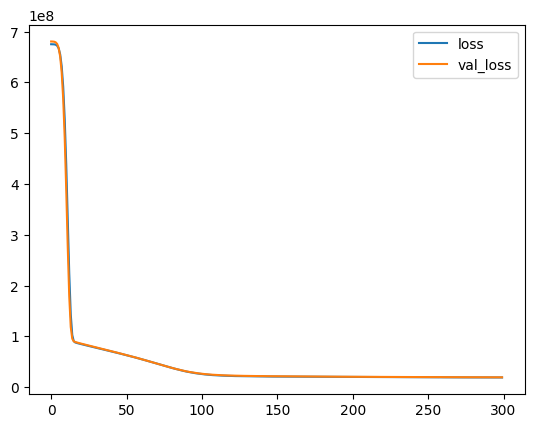

In [63]:
kayipverisi.plot()

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [65]:
tahmindizisi = model.predict(x_test)

122/122 [==============================] - 1s 5ms/step


In [66]:
tahmindizisi

array([[36255.58 ],
       [39449.582],
       [13805.554],
       ...,
       [14755.453],
       [15858.483],
       [43033.438]], dtype=float32)

In [67]:
mean_absolute_error(y_test, tahmindizisi)

3158.293987118528

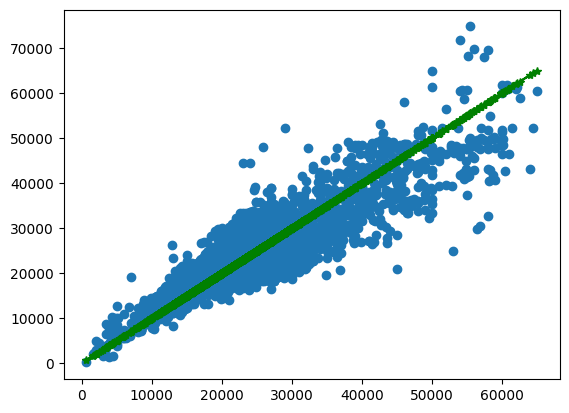

In [72]:
plt.scatter(y_test,tahmindizisi)
plt.plot(y_test, y_test, "g-*")

In [73]:
df.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [78]:
yeniarabaseries = df.drop("price", axis=1).iloc[2]

In [83]:
yeniarabaseries = scaler.transform(yeniarabaseries.values.reshape(-1,5))

In [84]:
model.predict(yeniarabaseries)

1/1 [==============================] - 0s 69ms/step


array([[62679.22]], dtype=float32)